In [1]:
import cv2
import matplotlib.pyplot as plt
import importlib
import cryptosystem

In [2]:
importlib.reload(cryptosystem)
from cryptosystem import Cryptosystem, Encryption, Decryption

In [3]:
image=cv2.imread('../pepper/pepperCipher.png')
image_name = "pepper"
x = Cryptosystem(image)

m,n: 256 256


In [4]:
k = "a97c4c724bb0eb9c49b97451a7a033d64de71daca3b26c2e04a1a3e264c1"
kd = "b97c4c724bb0eb9c49b97451a7a033d64de71daca3b26c2e04a1a3e264c1"

In [5]:
def hexadecimal_to_binary(hex_string):
    decimal_number = int(hex_string, 16)  # Convert hexadecimal string to decimal integer
    binary_string = bin(decimal_number)[2:]  # Convert decimal integer to binary string
    return binary_string



In [6]:
print(hexadecimal_to_binary(k))
print("\n ======== \n")
print(hexadecimal_to_binary(kd))

101010010111110001001100011100100100101110110000111010111001110001001001101110010111010001010001101001111010000000110011110101100100110111100111000111011010110010100011101100100110110000101110000001001010000110100011111000100110010011000001


101110010111110001001100011100100100101110110000111010111001110001001001101110010111010001010001101001111010000000110011110101100100110111100111000111011010110010100011101100100110110000101110000001001010000110100011111000100110010011000001


In [7]:
new_key = hexadecimal_to_binary(kd)

In [8]:
a1,b1,x0,y0 = x.generateInitials(new_key)
print(a1,b1,x0,y0)

19.064095997331503 17.76482710890383 -0.4762678891057588 -0.943110748255946


In [9]:
map1 = x.getChaoticMap(a1,b1,x0,y0)
map2 = x.getChaoticMap(a1,b1,map1[len(map1)-1][0],map1[len(map1)-1][1]) # map2 x0,y0 from the last values of map1 as given in paper
map3 = x.getChaoticMap(a1,b1,map2[len(map2)-1][0],map2[len(map2)-1][1])
map4 = x.getChaoticMap(a1,b1,map3[len(map3)-1][0],map3[len(map3)-1][1])
map5 = x.getChaoticMap(a1,b1,map4[len(map4)-1][0],map4[len(map4)-1][1])
map6 = x.getChaoticMap(a1,b1,map5[len(map5)-1][0],map5[len(map5)-1][1])

In [21]:
IV = x.getfloorIV(8,map1)

In [10]:
rm1 = x.getRuleMap(map2,8)
rm2 = x.getRuleMap(map3,8)
rm3 = x.getRuleMap(map5,8)
rm4 = x.getRuleMap(map6,8)

No of times rule present in rule map
{1: 34816, 2: 39168, 3: 33792, 4: 29440, 5: 30464, 6: 32512, 7: 31232, 8: 30720}
No of times rule present in rule map
{1: 39424, 2: 33536, 3: 35072, 4: 24832, 5: 27136, 6: 35584, 7: 34560, 8: 32000}
No of times rule present in rule map
{1: 36352, 2: 41216, 3: 30720, 4: 33280, 5: 26112, 6: 31488, 7: 29696, 8: 33280}
No of times rule present in rule map
{1: 31232, 2: 33280, 3: 33536, 4: 32000, 5: 31488, 6: 32000, 7: 31232, 8: 37376}


In [11]:
DSM = x.getDSMMap(map4,rm2)

No of times Neucleotides present in DSMap
{'T': 64762, 'C': 65283, 'G': 66043, 'A': 66056}


## Decryption

In [12]:
d=Decryption(image)

Displaying the pixel matrices over the Image


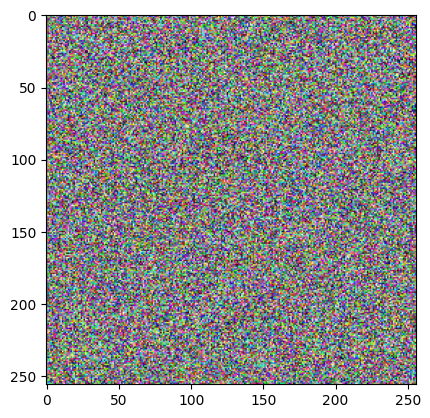

In [13]:
r,g,b=d.matrices()

In [14]:
ered,eblue,egreen   = d.encoding(r,g,b,rm4)

In [15]:
sred,sblue,sgreen = [],[],[]
sred   = d.rSubstitution(ered,DSM,rm3)
sblue  = d.rSubstitution(eblue,DSM,rm3)
sgreen = d.rSubstitution(egreen,DSM,rm3)

In [16]:
dred   = d.Decoding(sred,rm1)
dblue  = d.Decoding(sblue,rm1)
dgreen = d.Decoding(sgreen,rm1)

In [17]:
fred = d.toMatrix(dred)
fblue = d.toMatrix(dblue)
fgreen = d.toMatrix(dgreen)

In [18]:
dmixRed = d.rSpiralMixing(fred)
dmixBlue = d.rSpiralMixing(fblue)
dmixGreen = d.rSpiralMixing(fgreen)

In [19]:
dacmr,dacmg,dacmb = d.applyRevACM(dmixRed,dmixGreen,dmixBlue)

m= 256, n= 256,
N(length of side) = 256,
alpha(number of squares) = 1,
L(an extra length) = 0,
eta(length of overlapping except last) = 256, k = 127.
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 

In [22]:
dfinalR = d.rmixRow(dacmr,IV)
dfinalG = d.rmixRow(dacmg,IV)
dfinalB = d.rmixRow(dacmb,IV)

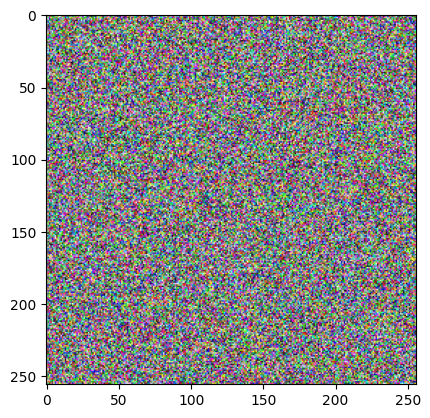

In [23]:
decodedImage=d.getDecodedImage(dfinalR,dfinalG,dfinalB)

In [24]:
import os
cipherd = cv2.merge((dfinalB,dfinalG,dfinalR))
ks_directory = f"outputs/key_sensitivity"
os.makedirs(ks_directory, exist_ok=True)  # Ensure directory exists

file_path = os.path.join(ks_directory, f"{image_name}_ks.png")
success = cv2.imwrite(file_path, cipherd)
if success:
    print(f"Image saved successfully at {file_path}")
else:
    print("Failed to save image. Check if the image is valid.")

Image saved successfully at outputs/key_sensitivity\pepper_ks.png
